Identify 2 proprotional, 2 non proportional and 2 complex models to test

In [2]:
import sksurv as sks
import sksurv.preprocessing
import sksurv.metrics
import sksurv.datasets
import sksurv.linear_model
import sksurv.ensemble

from pathlib import Path
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import sklearn as skl
import scipy.stats as sp

import pymc as pm
import pymc_bart as pmb
import pandas as pd

import importlib
import mlflow as ml
import simsurv_func as ssf
import subprocess

In [2]:
plt.ioff()
np.random.seed(99)

# Proprotional

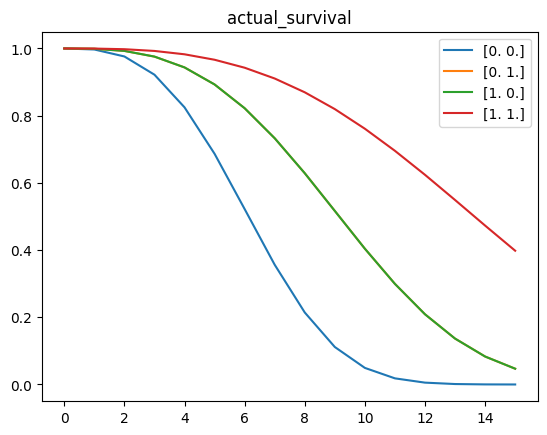

cens_calc: 0.81     
t_mean: 4.83     
t_max: 16.0


In [111]:
OUTPUTS = "outputs"
ALPHA = 3
LAMBDA = "np.exp(2 + 0.4*(x_mat[:,0] + x_mat[:,1]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
# T = 30
X_VARS = 2
CENS_SCALE = 5 # 40
CENS_IND = True

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = True,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")


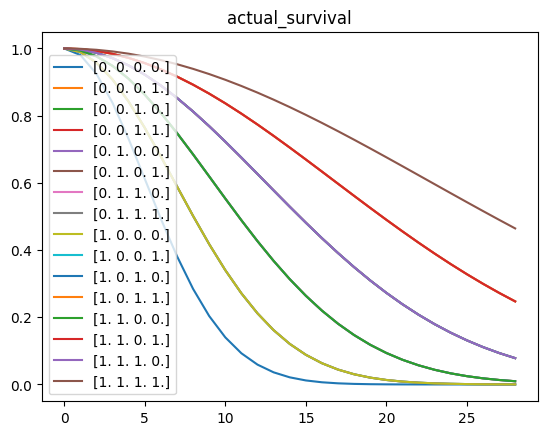

cens_calc: 0.79     
t_mean: 5.49     
t_max: 29.0


In [123]:
OUTPUTS = "outputs"
ALPHA = 2
LAMBDA = "np.exp(2 + .3*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + 2* x_mat[:,3]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
# T = 30
X_VARS = 4
CENS_SCALE = 7
CENS_IND = True

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = CENS_IND,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")

# notes on alpha and lambda metrics
## Alpha
- alpha increase pulls the middle of each curve up and to the right.
- low alpha means quick drop
- high alpha means long wait for drop

## Lambda
- controls the rate of the curve
- high alpha is a long c curv down
- 3 components exp({base} + {cov_base_mult} ({coeff}*{cov})
- cov_vase_mult     controls generally the covariate effect [0,1]
- base              controls time out (bigger = longer)
- coef              controls specific covariate effects
- bigger lambda raises the curve

# Non-proprtional

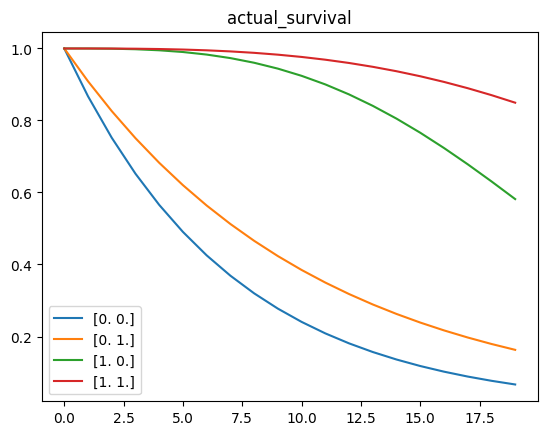

cens_calc: 0.79     
t_mean: 4.93     
t_max: 20.0


In [138]:
OUTPUTS = "outputs"
ALPHA = 2
ALPHA_F = "1 + 2 * x_mat[:,0]"
LAMBDA = "np.exp(2 + .4*(3 * x_mat[:,0] +  x_mat[:,1]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
X_VARS = 2
CENS_SCALE = 5
CENS_IND = True

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                alpha_f = ALPHA_F,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = CENS_IND,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")

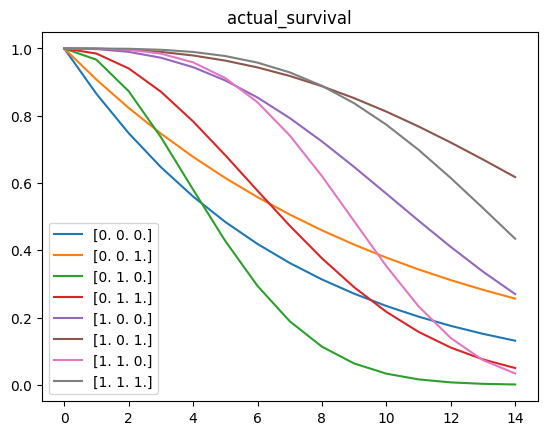

cens_calc: 0.84     
t_mean: 3.66     
t_max: 15.0


In [145]:
OUTPUTS = "outputs"
ALPHA = 2
ALPHA_F = "1 + (1.5 * x_mat[:,0]) + x_mat[:,1]"
# LAMBDA = "np.exp(3 + 0.4*(x_mat[:,0] + 0.5*x_mat[:,1] + 1.2*x_mat[:,2] + 0.8*x_mat[:,3]))"
LAMBDA = "np.exp(2 + .2*(3 * x_mat[:,0] - 1.2*x_mat[:,1] + 2*x_mat[:,2]))"
# LAMBDA = "np.exp(2 + .4*(3 * x_mat[:,0] +  x_mat[:,1]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
# T = 30
X_VARS = 3
CENS_SCALE = 4
CENS_IND = True

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                alpha_f = ALPHA_F,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = CENS_IND,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")

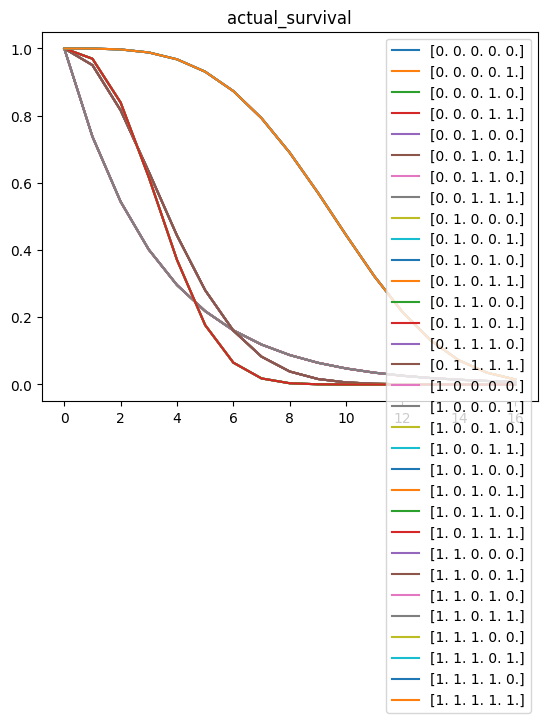

cens_calc: 0.0     
t_mean: 6.07     
t_max: 17.0


In [151]:
# Non Linear
OUTPUTS = "outputs"
ALPHA = 2
ALPHA_F = "1 + (1.5 * x_mat[:,0]) + x_mat[:,1]"
LAMBDA = "np.exp(1 + .2*x_mat[:,0] + .3*x_mat[:,1] + 0.8*np.sin(x_mat[:,0] * x_mat[:,1]) + np.power((x_mat[:,2] - 0.5),2))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
# T = 30
X_VARS = 5
CENS_SCALE = 5
CENS_IND = False

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                alpha_f = ALPHA_F,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = CENS_IND,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")

0.3623577544766737